In [3]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
df=pd.read_csv('../dataset/real_estate.csv')

In [5]:
df

,Unnamed: 0,Date Recorded,List Year,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Longitude,Latitude
0,0,2021-04-14,2020,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,-73.068220,41.350140
1,1,2021-05-26,2020,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,-73.084938,41.346439
2,2,2021-09-13,2020,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,Commercial,-73.084938,41.346439
3,3,2020-12-14,2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,-73.084938,41.346439
4,4,2021-09-07,2020,Avon,245 NEW ROAD,217640.0,400000.0,0.5441,Residential,Single Family,-72.830800,41.809500
...,...,...,...,...,...,...,...,...,...,...,...,...
1045447,1054154,2021-11-16,2021,Watertown,50 SUMMIT RIDGE,263100.0,430000.0,0.6118,Residential,Single Family,-73.114797,41.586333
1045448,1054155,2022-09-20,2021,Woodbury,89 TAMARACK LANR UNIT 89A,79810.0,200000.0,0.3990,Residential,Condo,-73.232742,41.517140
1045449,1054156,2022-05-06,2021,Woodbury,69 BACON POND ROAD,79590.0,360000.0,0.2210,Vacant Land,Vacant Land,-73.191290,41.543605
1045450,1054157,2022-06-29,2021,West Haven,114 TUTHILL ST,117600.0,275000.0,0.4276,Residential,Single Family,-72.976177,41.281588


In [6]:
df=df.drop(columns='Unnamed: 0')

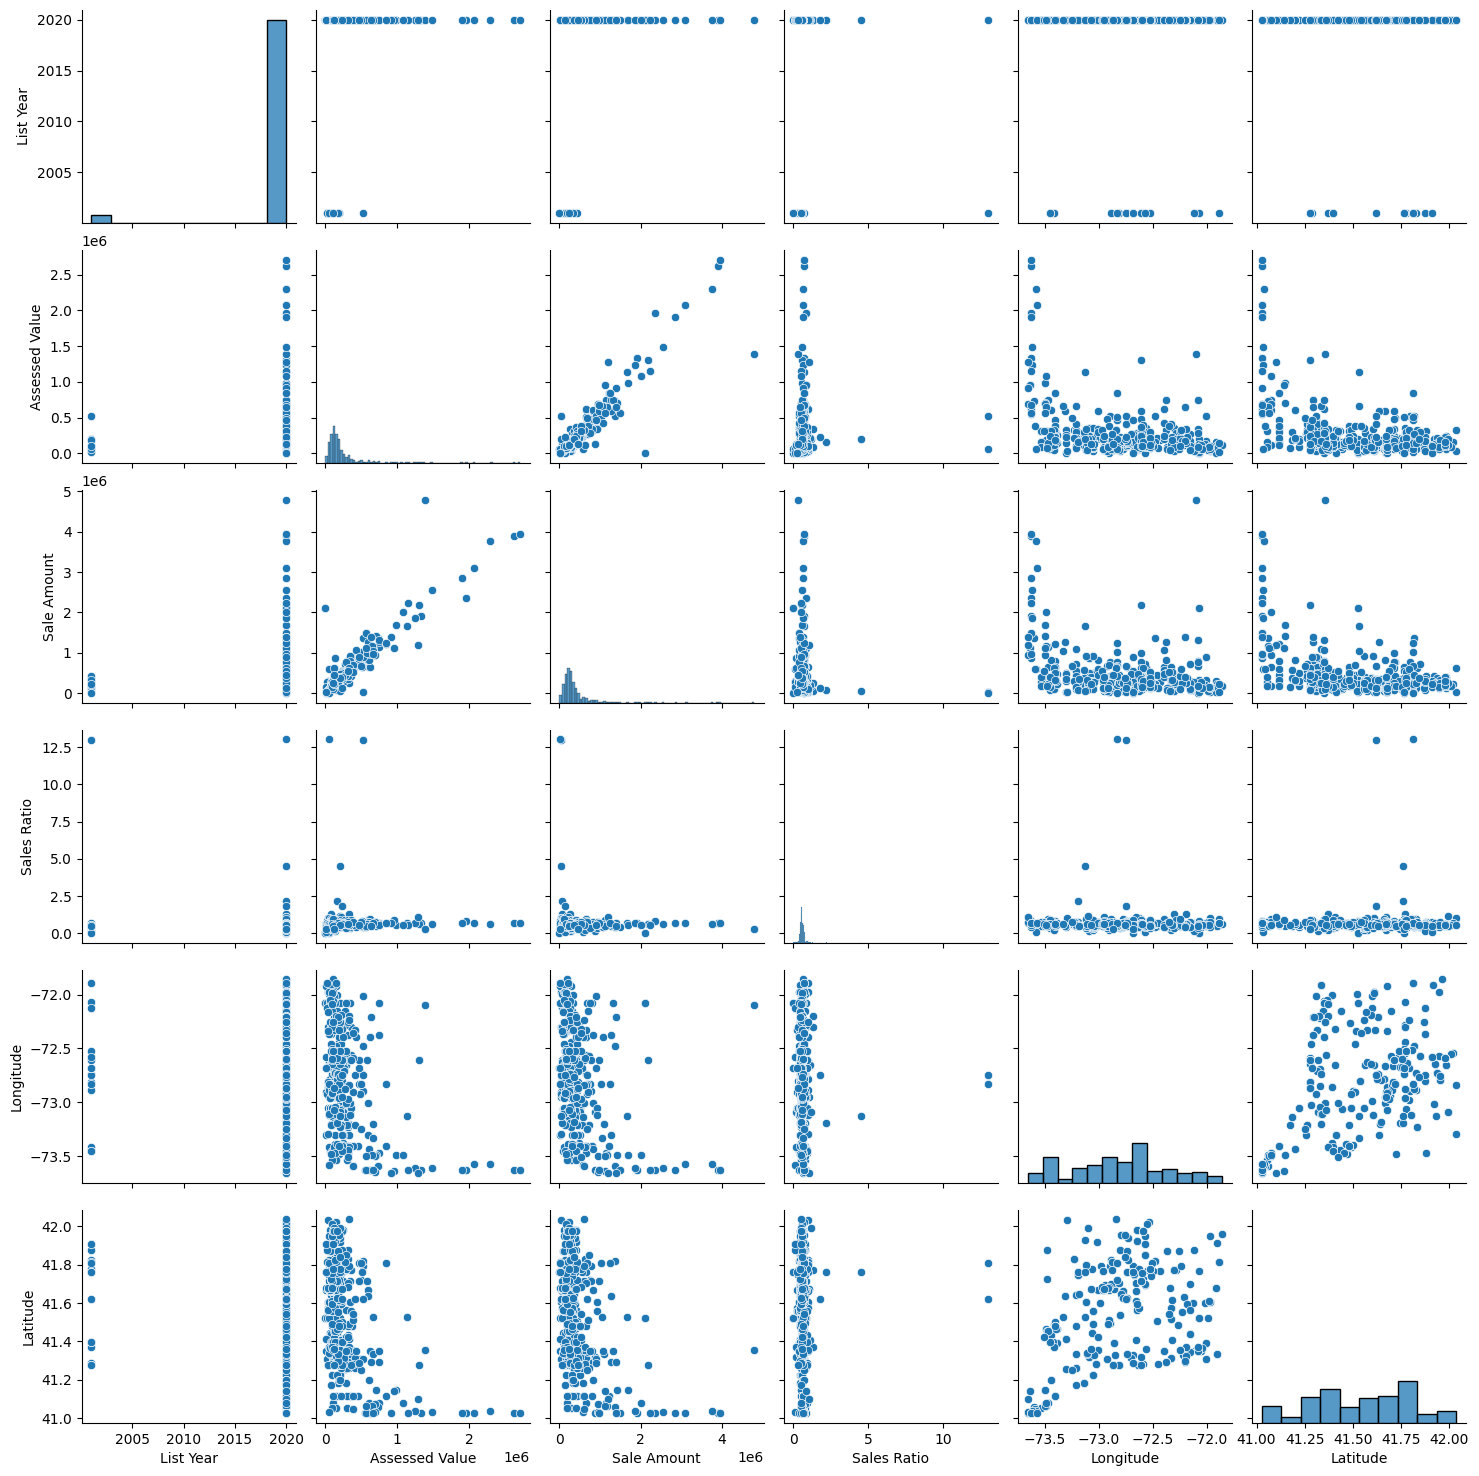

In [7]:
sns.pairplot(data=df[:500])

<Axes: xlabel='Latitude', ylabel='Longitude'>

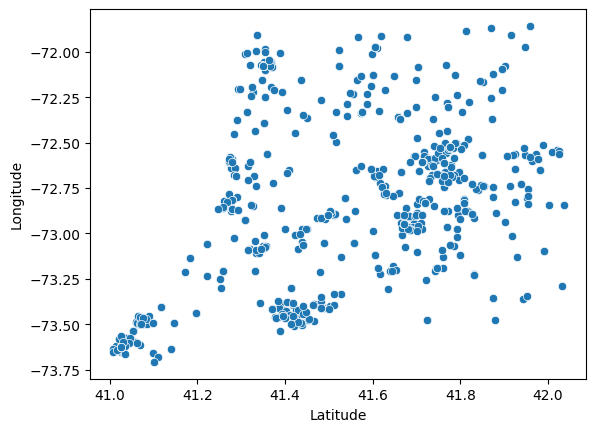

In [8]:
sns.scatterplot(data=df[:1000],x='Latitude',y='Longitude')

In [9]:
X=df[['Longitude','Latitude']][:1000]

In [10]:
SSE=[]
k_range=range(1,11)

In [11]:
for k in k_range:
    kmean=KMeans(n_clusters=k,random_state=42)
    kmean.fit(X)
    SSE.append(kmean.inertia_)

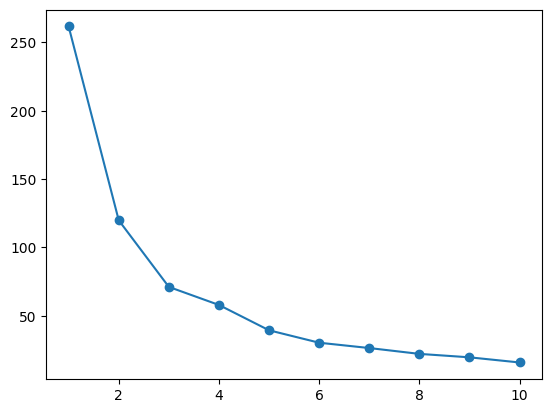

In [12]:
plt.plot(k_range,SSE,'o-')

In [13]:
Kmeans=KMeans(n_clusters=6,random_state=42,init='k-means++')

In [14]:
Kmeans.fit(X)

KMeans(n_clusters=6, random_state=42)

In [15]:
centroid=Kmeans.cluster_centers_
labels=Kmeans.labels_

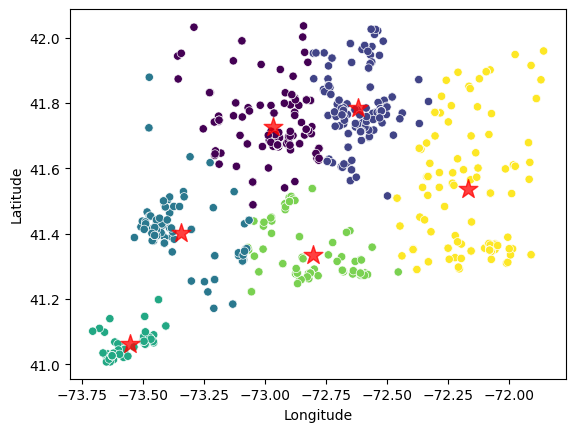

In [16]:
sns.scatterplot(x=X.iloc[:,0],y=X.iloc[:,1],c=labels,cmap='viridis')
plt.scatter(centroid[:, 0], centroid[:, 1], c='red', s=200, alpha=0.75, marker='*')

In [17]:
silhouette_score(X,labels)

0.4767117040046095